<a href="https://colab.research.google.com/github/Anvita0305/Crop-Recommendation-System/blob/main/nithackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
print("Enter Geolocation:")
geoloc=input()

Enter Geolocation:
LAKSHADWEEP


In [306]:
  import numpy as np
  import pandas as pd
  import tensorflow as tf
  import csv

In [307]:
base_dir="/content/rainfall in india 1901-2015.csv"
df=pd.read_csv(base_dir)

In [308]:
df.index=df["YEAR"]
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
YEAR,,,,,,,,,,,,,,,,,,,
1901,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1902,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
1903,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
1904,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
1905,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [309]:
df.drop(df.columns[[14, 15, 16,17,18]], axis=1, inplace=True)
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,,,
1901,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1902,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
1903,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
1904,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
1905,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7


In [310]:
groups = df.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
df=groups.get_group((geoloc))  #take as input

<ipython-input-310-bbef44f5b433>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groups = df.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']


In [311]:
df.fillna(df.mean(),inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


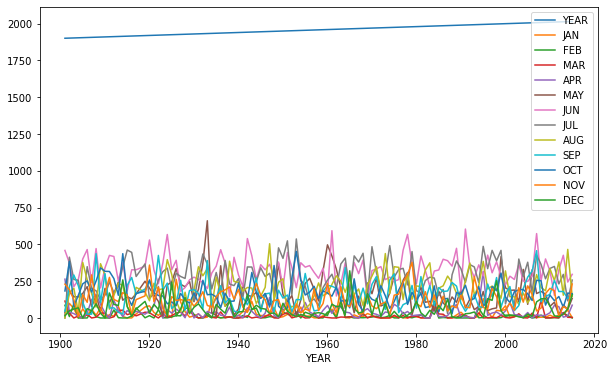

In [312]:
df.plot(figsize=(10,6))

In [313]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,,
1901,1901,22.6,86.4,114.8,263.8,37.3,459.0,0.0,0.0,46.7,183.7,229.900000,15.000000
1902,1902,99.3,9.6,32.6,40.4,179.1,374.2,413.3,170.0,214.3,384.2,192.800000,49.000000
1903,1903,63.5,95.0,0.0,29.5,144.1,212.4,261.8,202.0,292.1,79.1,124.840741,60.810909
1904,1904,0.0,0.0,13.5,13.2,143.3,261.3,256.0,38.9,219.9,153.6,8.300000,68.900000
1905,1905,62.4,0.0,0.0,0.0,166.7,400.7,68.7,377.5,107.5,232.1,159.300000,0.000000


In [314]:
data=df[
    ['JAN',
     'FEB',
     'MAR',
     'APR',
     'MAY',
     'JUN',
     'JUL',
     'AUG',
     'SEP',
     'OCT',
     'NOV',
     'DEC']]
data.columns=['01-JAN',
 '02-FEB',
 '03-MAR',
 '04-APR',
 '05-MAY',
 '06-JUN',
 '07-JUL',
 '08-AUG',
 '09-SEP',
 '10-OCT',
 '11-NOV',
 "12-DEC"]
# print(data)
data=data.unstack().reset_index(name="target")

In [315]:
print(data)

     level_0  YEAR  target
0     01-JAN  1901    22.6
1     01-JAN  1902    99.3
2     01-JAN  1903    63.5
3     01-JAN  1904     0.0
4     01-JAN  1905    62.4
...      ...   ...     ...
1363  12-DEC  2011    14.9
1364  12-DEC  2012     8.8
1365  12-DEC  2013    26.7
1366  12-DEC  2014    62.3
1367  12-DEC  2015   159.0

[1368 rows x 3 columns]


In [316]:
data.describe()

,YEAR,target
count,1368.000000,1368.000000
mean,1958.350877,133.319775
std,33.140780,127.610361
min,1901.000000,0.000000
25%,1930.000000,22.375000
50%,1958.500000,97.900000
75%,1987.000000,211.050000
max,2015.000000,660.800000


In [317]:


# len_train=int(len(data)*0.7)
# len_test=len(data)-len_train
# train_data=data[:len_train]
# test_data=data[len_train:]

In [318]:
data

,level_0,YEAR,target
0,01-JAN,1901,22.6
1,01-JAN,1902,99.3
2,01-JAN,1903,63.5
3,01-JAN,1904,0.0
4,01-JAN,1905,62.4
...,...,...,...
1363,12-DEC,2011,14.9
1364,12-DEC,2012,8.8
1365,12-DEC,2013,26.7
1366,12-DEC,2014,62.3


In [319]:
header=list(data.columns)
print(header)
target="target"
header.remove(target)

['level_0', 'YEAR', 'target']


In [320]:
# pip install --upgrade category_encoders


In [321]:
import category_encoders as ce
encoder=ce.OneHotEncoder()
encoder.fit(data[header],data[target])
transformed_train=encoder.transform(data[header])
print(transformed_train)

      level_0_1  level_0_2  level_0_3  level_0_4  level_0_5  level_0_6  \
0             1          0          0          0          0          0   
1             1          0          0          0          0          0   
2             1          0          0          0          0          0   
3             1          0          0          0          0          0   
4             1          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
1363          0          0          0          0          0          0   
1364          0          0          0          0          0          0   
1365          0          0          0          0          0          0   
1366          0          0          0          0          0          0   
1367          0          0          0          0          0          0   

      level_0_7  level_0_8  level_0_9  level_0_10  level_0_11  level_0_12  \
0             0          0        

In [322]:
len=1380*0.7
len=int(len)
train_set=transformed_train[:len]
test_set=transformed_train[len:]
# train_target=data[target]

print(train_set,data[target][:len])

     level_0_1  level_0_2  level_0_3  level_0_4  level_0_5  level_0_6  \
0            1          0          0          0          0          0   
1            1          0          0          0          0          0   
2            1          0          0          0          0          0   
3            1          0          0          0          0          0   
4            1          0          0          0          0          0   
..         ...        ...        ...        ...        ...        ...   
960          0          0          0          0          0          0   
961          0          0          0          0          0          0   
962          0          0          0          0          0          0   
963          0          0          0          0          0          0   
964          0          0          0          0          0          0   

     level_0_7  level_0_8  level_0_9  level_0_10  level_0_11  level_0_12  YEAR  
0            0          0          0      

In [323]:
print(test_set,data[target][len:])

      level_0_1  level_0_2  level_0_3  level_0_4  level_0_5  level_0_6  \
965           0          0          0          0          0          0   
966           0          0          0          0          0          0   
967           0          0          0          0          0          0   
968           0          0          0          0          0          0   
969           0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
1363          0          0          0          0          0          0   
1364          0          0          0          0          0          0   
1365          0          0          0          0          0          0   
1366          0          0          0          0          0          0   
1367          0          0          0          0          0          0   

      level_0_7  level_0_8  level_0_9  level_0_10  level_0_11  level_0_12  \
965           0          0        

In [324]:
# pip install plotly

In [325]:
# pip install xgboost

In [328]:
months=input("Enter Month:")
months=months.lower()
year=int(input("Enter Year:"))
months_list = ['january', 'february', 'march', 'april', 'may', 'june','july', 'august', 'september', 'october', 'november', 'december']
l=[0]*12
l[months_list.index(months)]=1
l.append(year)
test=[]
test.append(l)
test=pd.DataFrame(data=test,columns=["level_0_1","level_0_2","level_0_3","level_0_4","level_0_5","level_0_6","level_0_7","level_0_8","level_0_9","level_0_10","level_0_11","level_0_12","YEAR"])
test

Enter Month:May
Enter Year:2016


,level_0_1,level_0_2,level_0_3,level_0_4,level_0_5,level_0_6,level_0_7,level_0_8,level_0_9,level_0_10,level_0_11,level_0_12,YEAR
0,0,0,0,0,1,0,0,0,0,0,0,0,2016


In [331]:
from sklearn.model_selection import GridSearchCV
import sklearn.compose
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import sklearn.ensemble
import xgboost

param_grid = {'n_estimators': [200,120, 100, 60, 55, 51, 40],  
              'max_depth': [3, 30],
              'reg_lambda' :[0.1,0.5,0.01,0.05,0.08,1.2,0.001,1.5,2,0.000001],
              # 'reg_lambda' :[0.000001]

             }
                
grid = GridSearchCV(XGBRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = sklearn.compose.TransformedTargetRegressor(regressor=grid, transformer=sklearn.preprocessing.QuantileTransformer(output_distribution='normal'))

grid_result=regr_trans.fit(train_set, data[target][:len])
yhat = regr_trans.predict(test)
rainfall_pred=yhat
print(rainfall_pred)
# train_set.iloc[-1] = test
# print(test_set.head())
# print(yhat)
# print(data[target][965:])
print(grid_result.score(test_set, data[target][len:]))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (965). n_quantiles is set to n_samples.
  warnings.warn(


Fitting 5 folds for each of 140 candidates, totalling 700 fits
[16:24:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[154.54541]
-0.11465372810380514


In [332]:
# pickling the model
import pickle
pickle_out = open("classifier_LAKSHADWEEP.pkl", "wb")
pickle.dump(regr_trans, pickle_out)
pickle_out.close()


In [300]:
#now above model will predict rainfall based on:
# 1. Input Month
# 2. Input Year
# 3. Input Subdivision


# The output is rainfall in mm
# Based on the rainfall predict crop from crop prediction dataset 

In [65]:
crop_dir="/content/Crop_recommendation.csv"

cdf=pd.read_csv(crop_dir)
cdf

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [66]:
cdf.dropna()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [67]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

le = preprocessing.LabelEncoder()
X = cdf.iloc[:, 0:7]
y = cdf['label']
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(y)


[20 20 20 ...  5  5  5]


In [68]:
nitro=float(input("Nitrogen:"))
phos=float(input("Phosporous:"))
pot=float(input("Potassium:"))
temp=float(input("Temperature:"))
hum=float(input("Humidity:"))
ph=float(input("pH:"))
rain=rainfall_pred[0]
l=[nitro,phos,pot,temp,hum,ph,rain]

Nitrogen:30
Phosporous:30
Potassium:30
Temperature:30
Humidity:50
pH:3


In [69]:
test=[l]
test=pd.DataFrame(data=test,columns=["N","P","K","temperature","humidity","ph","rainfall"])
test

,N,P,K,temperature,humidity,ph,rainfall
0,30.0,30.0,30.0,30.0,50.0,3.0,35.73267


In [71]:
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(test)
print("Prediction:",y_pred)
print(le.inverse_transform(y_pred)[0])
l=clf.predict_proba(test)
temp=list(l[0])
temp.sort()
print("Top three choices can be:")
print(list(l[0]).index(temp[-1]))
print(list(l[0]).index(temp[-2]))
print(list(l[0]).index(temp[-3]))

print(le.inverse_transform([list(l[0]).index(temp[-1])])[0])
print(le.inverse_transform([list(l[0]).index(temp[-2])])[0])
print(le.inverse_transform([list(l[0]).index(temp[-3])])[0])

Prediction: [13]
mothbeans
Top three choices can be:
13
12
14
mothbeans
mango
mungbean


In [72]:
import pickle
pickle_out = open("classifier_final.pkl", "wb")
pickle.dump(clf, pickle_out)
pickle_out.close()